###  MULTIPLE LINEAR REGRESSION (advertising.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### getting data set

In [2]:
df = pd.read_csv('datasets/Advertising.csv', index_col = 0)
cols = df.columns[:-1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#print(X[:, 1])
#print(df)

#### splitting the data set into train and test (70/30)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

#### training MLR model on training set

In [4]:
from sklearn.linear_model import LinearRegression


def trainModel(X, y, regressor):
    regressor.fit(X, y)
    B0 = regressor.intercept_.round(4)
    Bi = regressor.coef_.round(4)
    print("intercept: {}".format(B0))
    print("coefficients: {}".format(Bi))
    return (B0, Bi)
    
    

In [5]:
regressor = LinearRegression()
B0, Bi = trainModel(X_train, y_train, regressor)



intercept: 3.0763
coefficients: [ 0.0464  0.1825 -0.002 ]


#### using model to predict against the test data set

In [6]:
est_y = {}
est_y = regressor.predict(X_test).round(2)
#print("{} : {}".format(est_y['TV'], y_test))

#### calculating accuracy using R^2

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, est_y).round(4)
print(r2)

0.9035


#### visualising train data set

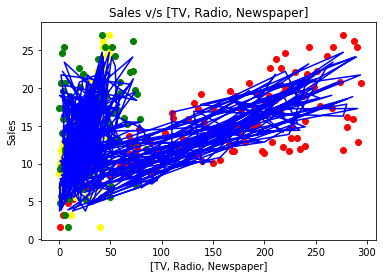

In [8]:

plt.scatter(X_train[:,0] , y_train, color = 'red')
plt.scatter(X_train[:,1] , y_train, color = 'yellow')
plt.scatter(X_train[:,2] , y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Sales v/s [TV, Radio, Newspaper]')
plt.xlabel('[TV, Radio, Newspaper]')
plt.ylabel("Sales")
plt.show()

#### visualising test data set

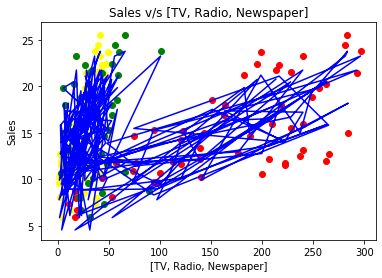

In [9]:

plt.scatter(X_test[:,0] , y_test, color = 'red')
plt.scatter(X_test[:,1] , y_test, color = 'yellow')
plt.scatter(X_test[:,2] , y_test, color = 'green')
plt.plot(X_test, est_y, color='blue')
plt.title('Sales v/s [TV, Radio, Newspaper]')
plt.xlabel('[TV, Radio, Newspaper]')
plt.ylabel("Sales")
plt.show()

#### plot of actual sales v/s predicted sales

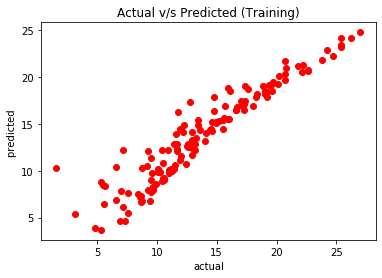

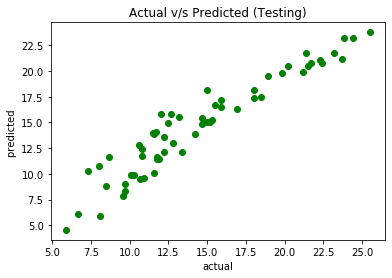

In [11]:
plt.scatter(y_train,regressor.predict(X_train), color = 'red')
plt.title('Actual v/s Predicted (Training)')
plt.xlabel('actual')
plt.ylabel("predicted ")
plt.show()

plt.scatter(y_test,regressor.predict(X_test), color = 'green')
plt.title('Actual v/s Predicted (Testing)')
plt.xlabel('actual')
plt.ylabel("predicted ")
plt.show()

#### Testing for heteroscedasticity

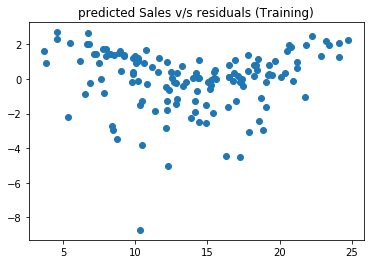

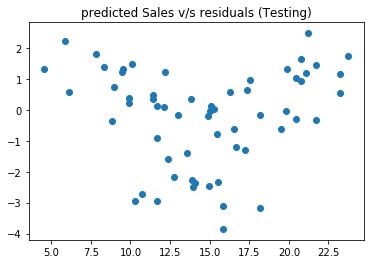

In [14]:
residual_train = y_train - regressor.predict(X_train)
residual_train = pd.Series(residual_train)
plt.scatter(regressor.predict(X_train), residual_train)
plt.title('predicted Sales v/s residuals (Training)')
plt.show()


residual_test = y_test - est_y
residual_test = pd.Series(residual_test)
plt.scatter(est_y, residual_test)
plt.title('predicted Sales v/s residuals (Testing)')
plt.show()

#### as a pattern is not visible on the plot (variance is n constant with increasing values), heteroscedasticity is absent

#### Detecting Outliers using z-score = (observation - mean)/standard deviation

In [12]:

def detect_outliers(x):
  outliers = {"TV":[], "Radio":[], "Newspaper":[]}
  #consider an outlier if it lies beyond 3rd standard deviation
  threshold = 3
  for i in range(len(cols)):
    mean = np.mean(x[:,i]).round(4)
    std = np.std(x[:,i]).round(4)

    for j in list(x[:,i]):
        zscore = (j - mean)/std
        if np.abs(zscore) > threshold:
            outliers[cols[i]].append(j)

  return outliers


In [13]:
outliers_train = detect_outliers(X_train)
outliers_test = detect_outliers(X_test)
print("outliers in the training data: {}".format(outliers_train))
print("outliers in the testing data: {}".format(outliers_test))

outliers in the training data: {'TV': [], 'Radio': [], 'Newspaper': [114.0]}
outliers in the testing data: {'TV': [], 'Radio': [], 'Newspaper': [100.9]}
